In [1]:
from pathlib import Path
base_path = Path("..") / "dataset"

import pandas as pd
data_features= pd.read_csv(base_path/"NUSW-NB15_features.csv", encoding='ISO-8859-1')
data= pd.read_csv(base_path/"UNSW_NB15_training-set.csv")
data_test= pd.read_csv(base_path/"UNSW_NB15_testing-set.csv")

In [2]:
data_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [3]:
data.shape

(175341, 45)

In [4]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
# features cardinality
data.nunique()

id                   175341
dur                   74039
proto                   133
service                  13
state                     9
spkts                   480
dpkts                   443
sbytes                 7214
dbytes                 6660
rate                  76991
sttl                     11
dttl                      6
sload                 80885
dload                 77474
sloss                   409
dloss                   370
sinpkt                76161
dinpkt                74245
sjit                  77532
djit                  76831
swin                     13
stcpb                 75265
dtcpb                 75089
dwin                      7
tcprtt                43319
synack                40142
ackdat                37708
smean                  1357
dmean                  1328
trans_depth              11
response_body_len      2386
ct_srv_src               52
ct_state_ttl              5
ct_dst_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm    

In [7]:
# null values count
data.isnull().sum().sort_values(ascending=False)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [17]:
# drop id as it's insignificant
data.drop(columns='id', inplace=True)

In [18]:
# Group features by dtype

# All features
all_features = data.columns.tolist()

# categorical features
categorical_features= ["proto", "service", "state"]

# label
label_features= ["attack_cat", "label"]

# numerical features
numerical_features = [col for col in all_features if col not in categorical_features and col not in label_features]

print(categorical_features, "\n", numerical_features)

['proto', 'service', 'state'] 
 ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [19]:
data[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   spkts              175341 non-null  int64  
 2   dpkts              175341 non-null  int64  
 3   sbytes             175341 non-null  int64  
 4   dbytes             175341 non-null  int64  
 5   rate               175341 non-null  float64
 6   sttl               175341 non-null  int64  
 7   dttl               175341 non-null  int64  
 8   sload              175341 non-null  float64
 9   dload              175341 non-null  float64
 10  sloss              175341 non-null  int64  
 11  dloss              175341 non-null  int64  
 12  sinpkt             175341 non-null  float64
 13  dinpkt             175341 non-null  float64
 14  sjit               175341 non-null  float64
 15  djit               175341 non-null  float64
 16  sw

In [20]:
# continuous features quality report
pd.set_option('display.float','{:.2f}'.format)
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
dur,175341.00,1.36,6.48,0.00,0.00,0.00,0.67,60.00
spkts,175341.00,20.30,136.89,1.00,2.00,2.00,12.00,9616.00
dpkts,175341.00,18.97,110.26,0.00,0.00,2.00,10.00,10974.00
sbytes,175341.00,8844.84,174765.64,28.00,114.00,430.00,1418.00,12965233.00
dbytes,175341.00,14928.92,143654.22,0.00,0.00,164.00,1102.00,14655550.00
rate,175341.00,95406.19,165400.98,0.00,32.79,3225.81,125000.00,1000000.00
sttl,175341.00,179.55,102.94,0.00,62.00,254.00,254.00,255.00
dttl,175341.00,79.61,110.51,0.00,0.00,29.00,252.00,254.00
sload,175341.00,73454033.19,188357447.00,0.00,13053.34,879674.75,88888888.00,5988000256.00
dload,175341.00,671205.57,2421312.39,0.00,0.00,1447.02,27844.87,22422730.00


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

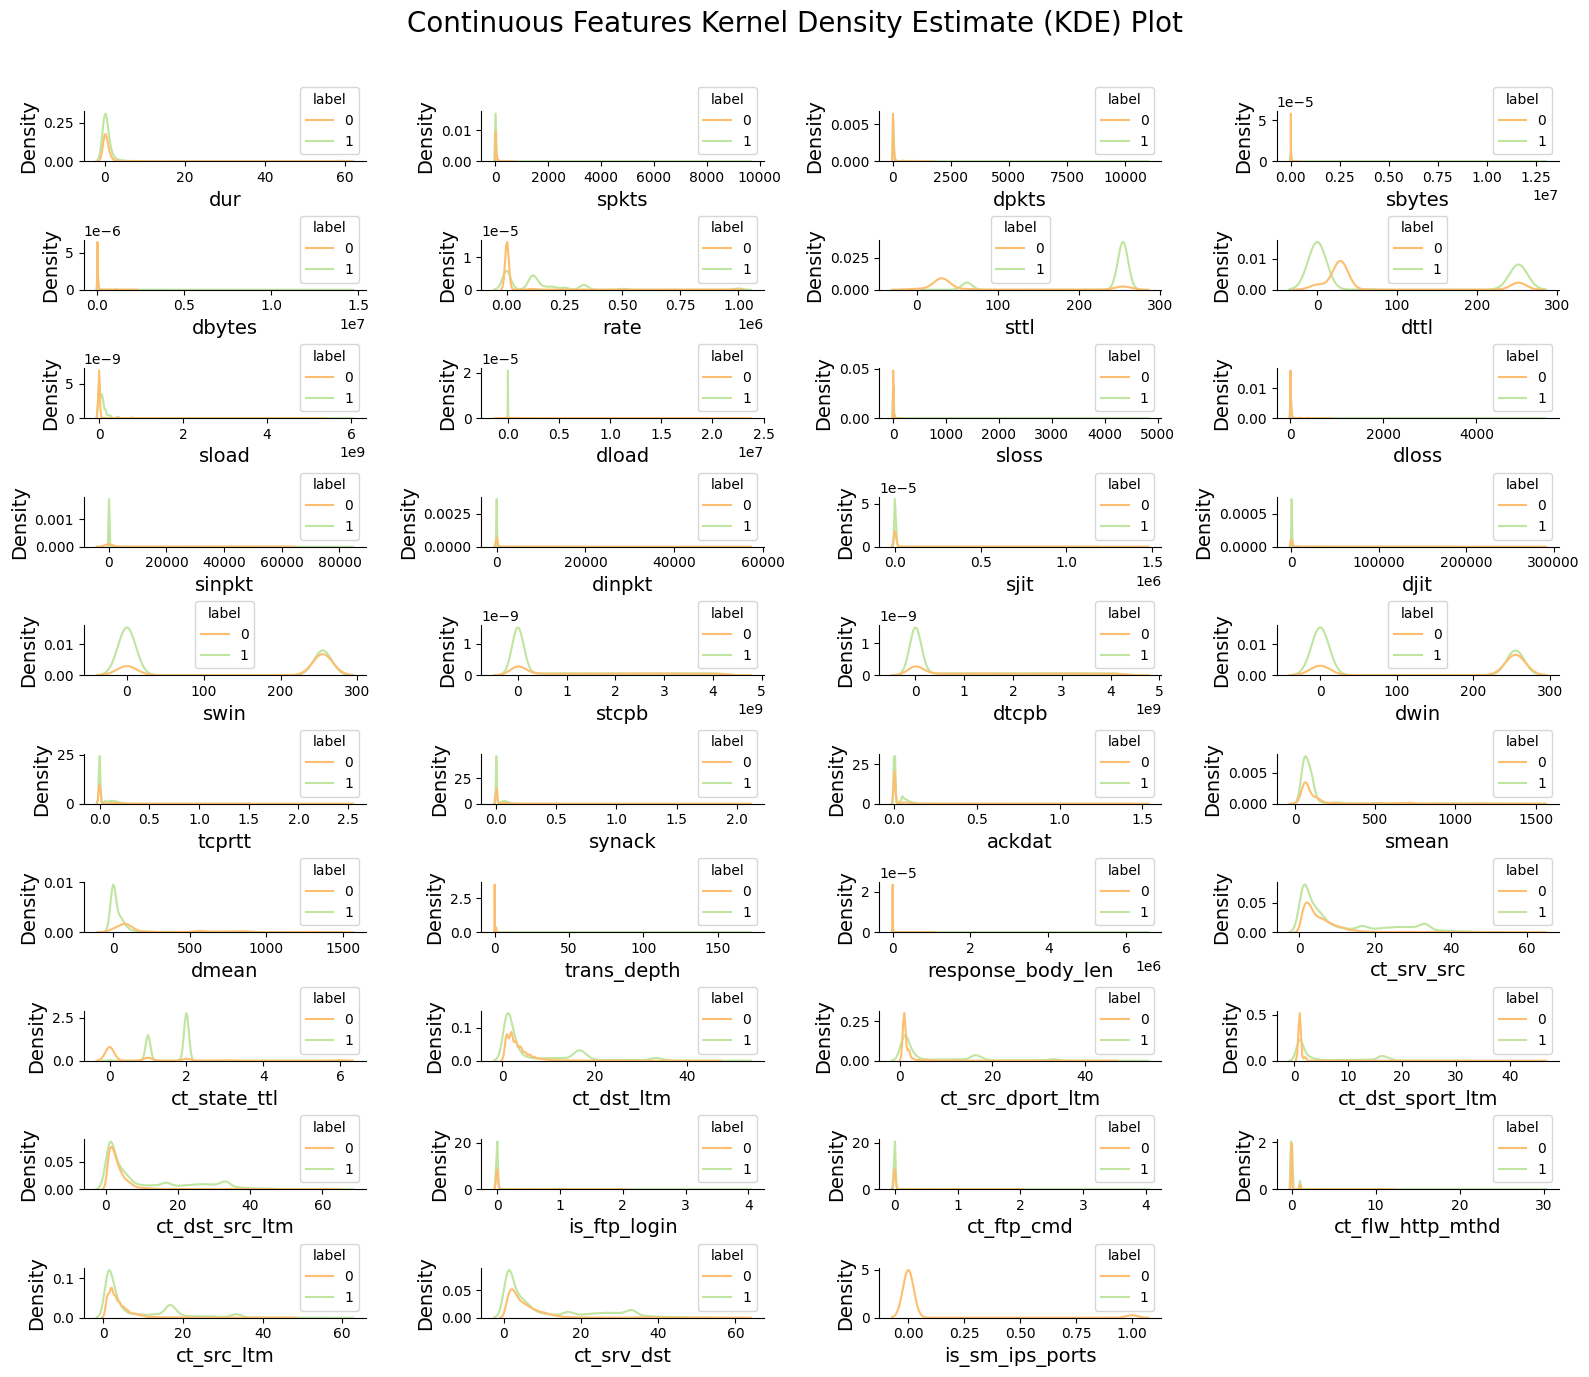

In [22]:
# visualizing continuous features distribution
L= len(numerical_features)
ncol= 4
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14))   
fig.subplots_adjust(top=0.92)
axes= axes.flatten()

# Hide empty subplots if any
if remove_last > 0:
    for j in range(1, remove_last + 1):
        axes[-j].set_visible(False)

# Plot each KDE
for i, col in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(data=data, x=col, hue="label", palette='Spectral', ax=ax)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    sns.despine(ax=ax)
plt.suptitle('Continuous Features Kernel Density Estimate (KDE) Plot', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

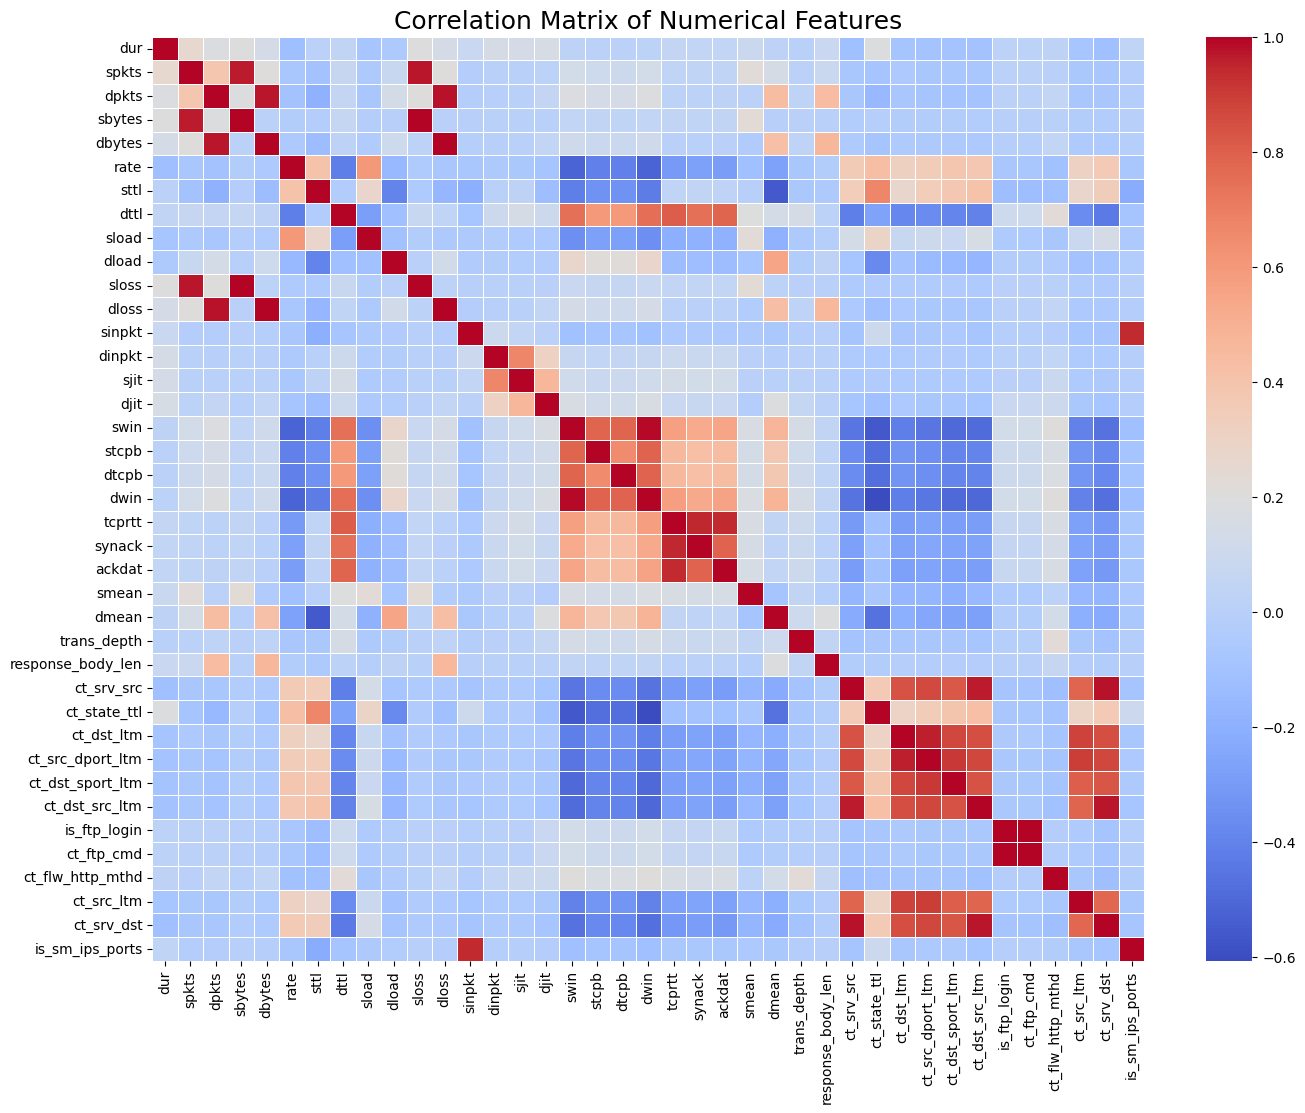

In [24]:
plt.figure(figsize=(16, 12))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=18)
plt.show()

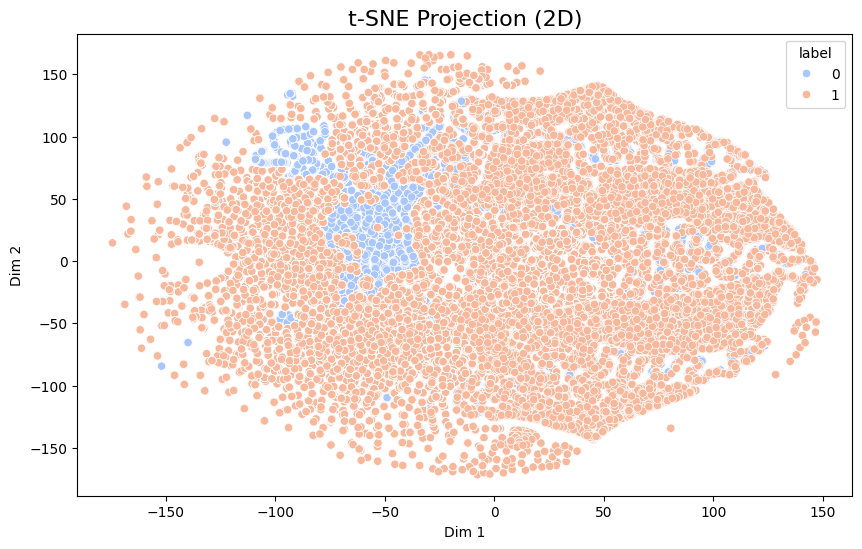

In [27]:
#Dimensity Reduction and 2D plots
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(data[numerical_features])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['label'], palette='coolwarm')
plt.title("t-SNE Projection (2D)", fontsize=16)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()